**Download Dataset**

---


https://www.kaggle.com/orgesleka/used-cars-database/discussion





**Import Libraries and Load Dataset**

---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df=pd.read_csv('../content/drive/My Drive/autos_clean_zipcode.csv', encoding='Latin-1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Exploratory Analysis data**

---



In [4]:
# Dataset preview
df.head()

,dateCrawled,name,price,vehicleType,yearOfRegistration,yearOfUsing,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,3/21/2016 21:46,Opel_Corsa_1.2_16V___2_HAND__KLIMA__8_FACH_T?V...,2238,small car,2003,13,manually,75,corsa,125000,5,petrol,opel,not,3/21/2016 0:00,Shahed,3/24/2016 11:46
1,4/4/2016 23:48,Mercedes_Benz_E_220_T_CDI_Avantgarde,12500,station wagon,2007,9,manually,170,e_klasse,150000,11,diesel,mercedes_benz,not,4/4/2016 0:00,Shahed,4/7/2016 4:16
2,3/17/2016 0:46,BMW_325_xi_E92_Coupe__EZ_12/2006___6__Gang_Sch...,13299,coupe,2006,10,manually,218,3er,125000,12,petrol,bmw,not,3/16/2016 0:00,Shahed,3/22/2016 10:17
3,3/29/2016 18:51,BMW_520d_Touring_Xenon_Navi+_PCD_Sport_Comf._1...,17200,station wagon,2012,4,manually,184,5er,150000,1,diesel,bmw,not,3/29/2016 0:00,Shahed,4/6/2016 4:45
4,3/28/2016 16:45,BMW_635_CSI_Schaltgetriebe_original_Fahrzeug_2...,8000,coupe,1980,36,manually,218,6er,150000,3,petrol,bmw,not,3/28/2016 0:00,Shahed,4/4/2016 19:45


In [5]:
# Review all column index
df.columns.values

array(['dateCrawled', 'name', 'price', 'vehicleType',
       'yearOfRegistration', 'yearOfUsing', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype=object)

In [6]:
# Number of rows and columns
print(df.shape)

(242109, 17)


In [7]:
# Check null data
df.isnull().sum()

dateCrawled            0
name                   0
price                  0
vehicleType            0
yearOfRegistration     0
yearOfUsing            0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64

In [8]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242109 entries, 0 to 242108
Data columns (total 17 columns):
dateCrawled            242109 non-null object
name                   242109 non-null object
price                  242109 non-null object
vehicleType            242109 non-null object
yearOfRegistration     242109 non-null int64
yearOfUsing            242109 non-null int64
gearbox                242109 non-null object
powerPS                242109 non-null int64
model                  242109 non-null object
kilometer              242109 non-null int64
monthOfRegistration    242109 non-null int64
fuelType               242109 non-null object
brand                  242109 non-null object
notRepairedDamage      242109 non-null object
dateCreated            242109 non-null object
postalCode             242109 non-null object
lastSeen               242109 non-null object
dtypes: int64(5), object(12)
memory usage: 31.4+ MB


In [0]:
# We found 'price' is mixed data types with string ('Lower Saxony') and number
# Only four rows has 'Lower Saxony' so that we drop them.
df_remove = df[df.price == 'Lower Saxony']
df= df.drop(df_remove.index)

In [0]:
# Convert price to integer
df['price']=df['price'].astype(int)

# Convert to str
columns = ['yearOfRegistration','monthOfRegistration','postalCode'] 
for x in columns:
  df[x]=df[x].astype(str)

In [11]:
# Data Statistics
df.describe()

,price,yearOfUsing,powerPS,kilometer
count,242105.000000,242105.000000,242105.000000,242105.000000
mean,6752.196968,12.385717,129.297173,123789.264988
std,7656.033019,6.297437,61.339541,39741.321291
min,200.000000,-1.000000,6.000000,5000.000000
25%,1700.000000,8.000000,86.000000,100000.000000
50%,4000.000000,12.000000,116.000000,150000.000000
75%,8950.000000,16.000000,160.000000,150000.000000
max,99999.000000,93.000000,1000.000000,150000.000000


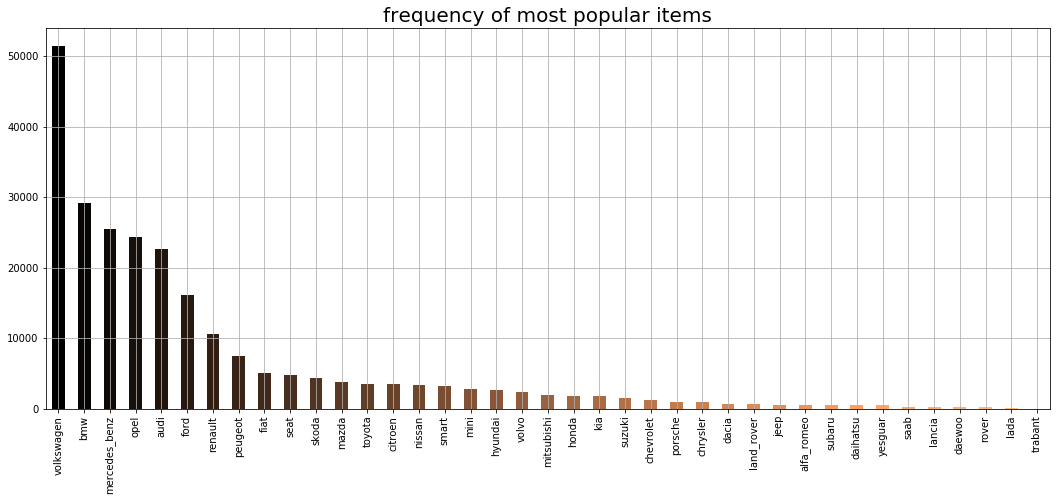

In [12]:
# Looking at the frequency of most popular Car Brand
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df.brand.value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [13]:
y = df.brand.value_counts().to_frame()
y.head(10)

,brand
volkswagen,51443
bmw,29175
mercedes_benz,25526
opel,24321
audi,22699
ford,16094
renault,10546
peugeot,7412
fiat,5093
seat,4758


In [14]:
y.index

Index(['volkswagen', 'bmw', 'mercedes_benz', 'opel', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat', 'skoda', 'mazda', 'toyota', 'citroen',
       'nissan', 'smart', 'mini', 'hyundai', 'volvo', 'mitsubishi', 'honda',
       'kia', 'suzuki', 'chevrolet', 'porsche', 'chrysler', 'dacia',
       'land_rover', 'jeep', 'alfa_romeo', 'subaru', 'daihatsu', 'yesguar',
       'saab', 'lancia', 'daewoo', 'rover', 'lada', 'trabant'],
      dtype='object')

<Figure size 1296x504 with 0 Axes>

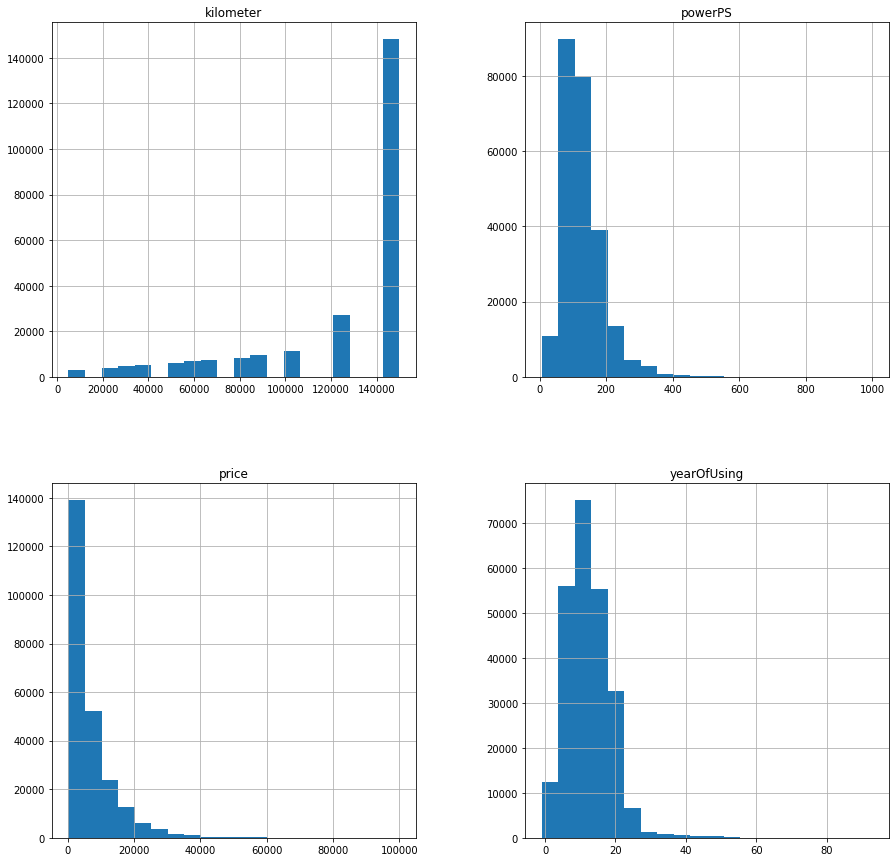

In [15]:
# Visualization for data statistic distribution
plt.figure()
df.hist(figsize=(15,15),bins=20)
plt.show()

In [16]:
# Correlation table
corMat = df.corr(method='pearson')
corMat

,price,yearOfUsing,powerPS,kilometer
price,1.000000,-0.504308,0.581624,-0.484205
yearOfUsing,-0.504308,1.000000,-0.211585,0.424714
powerPS,0.581624,-0.211585,1.000000,-0.013872
kilometer,-0.484205,0.424714,-0.013872,1.000000


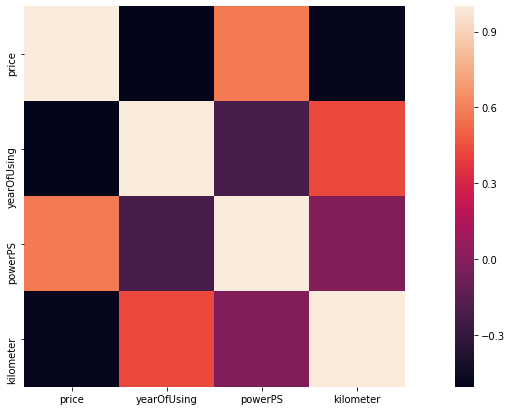

In [17]:
# Heat map
plt.figure()
sns.heatmap(corMat, square=True)
plt.show()

**Feature Engineering**
---



In [18]:
# Review all column index
df.columns.values

array(['dateCrawled', 'name', 'price', 'vehicleType',
       'yearOfRegistration', 'yearOfUsing', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype=object)

In [19]:
# Drop not important columns
df_new = df.drop(['dateCrawled', 'name', 'yearOfRegistration', 'monthOfRegistration', 'dateCreated', 'lastSeen'],axis=1)
df_new.columns.values

array(['price', 'vehicleType', 'yearOfUsing', 'gearbox', 'powerPS',
       'model', 'kilometer', 'fuelType', 'brand', 'notRepairedDamage',
       'postalCode'], dtype=object)

In [20]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
columns = ['vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage', 'postalCode']
le = LabelEncoder()
df_new[columns] = df_new[columns].apply(lambda x: le.fit_transform(x))

df_new.head()

,price,vehicleType,yearOfUsing,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
0,2238,5,13,1,75,69,125000,6,23,0,6472
1,12500,6,9,1,170,82,150000,1,19,0,6472
2,13299,2,10,1,218,5,125000,6,2,0,6472
3,17200,6,4,1,184,8,150000,1,2,0,6472
4,8000,2,36,1,218,10,150000,6,2,0,6472


In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242105 entries, 0 to 242108
Data columns (total 11 columns):
price                242105 non-null int64
vehicleType          242105 non-null int64
yearOfUsing          242105 non-null int64
gearbox              242105 non-null int64
powerPS              242105 non-null int64
model                242105 non-null int64
kilometer            242105 non-null int64
fuelType             242105 non-null int64
brand                242105 non-null int64
notRepairedDamage    242105 non-null int64
postalCode           242105 non-null int64
dtypes: int64(11)
memory usage: 22.2 MB


In [0]:
# One Hot Encoding
# df_new = pd.get_dummies(df_new[['price','vehicleType','yearOfUsing','gearbox','powerPS','model','fuelType','brand','notRepairedDamage']])

**Split Dataset**


---



In [0]:
from sklearn.model_selection import train_test_split
X= df_new.drop(['price'], axis=1)
y =df_new['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

**KNN Regression**


---



In [0]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [25]:
# Checnk K from 1 to 20
rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,y_pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

print('\nWhen k is',rmse_val.index(min(rmse_val))+1, 'we can get minimum RMSE:', min(rmse_val))    

RMSE value for k=  1 is: 4979.083620730316
RMSE value for k=  2 is: 4639.4695260430935
RMSE value for k=  3 is: 4511.547261620518
RMSE value for k=  4 is: 4457.800532148259
RMSE value for k=  5 is: 4446.4365010197225
RMSE value for k=  6 is: 4446.592946786112
RMSE value for k=  7 is: 4444.9174576671785
RMSE value for k=  8 is: 4444.5148207438915
RMSE value for k=  9 is: 4447.485179544738
RMSE value for k=  10 is: 4455.54721489346
RMSE value for k=  11 is: 4467.10948983663
RMSE value for k=  12 is: 4479.778886598858
RMSE value for k=  13 is: 4495.478204768784
RMSE value for k=  14 is: 4506.629204576699
RMSE value for k=  15 is: 4518.263685895295
RMSE value for k=  16 is: 4532.454073668732
RMSE value for k=  17 is: 4548.850189172047
RMSE value for k=  18 is: 4561.336844808742
RMSE value for k=  19 is: 4572.244096040852
RMSE value for k=  20 is: 4582.587956341021

When k is 8 we can get minimum RMSE: 4444.5148207438915


**Reference**


---



*   https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/
*   https://cmdlinetips.com/2019/10/how-to-drop-rows-based-on-a-column-value-in-pandas-dataframe/
*   https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

